# Analysis of sold new cars in Estonia 2020

Data is taken from official source - https://www.mnt.ee/et/ametist/statistika/soidukite-statistika

Period - from 01.2020 till 12.2020.

Only new cars where used in this analysis.


# Findings
1. 26133 cars were sold for this period.
2. ~67% petrol, ~25% diesel, ~6% hybrid cars...
3. ~24% has engine capacity of ~2.0 liters, ~16% ~1.6 liters, ~13% ~1.5 liters...
4. Most popular brands/marks in Estonia: TOYOTA, SKODA, RENAULT, VOLKSWAGEN, KIA...
5. ~42% of all cars are SUVs
6. Corporate clients buy cheaper cars with smaller engines(ex. Renault Clio), private clients buy more expensive cars with bigger engines(ex. Toyota Rav4)
7. People from different cities buy different cars.
8. People don't buy what they want, people buy what dealers have in stock
(Most popular petrol/diesel cars: TOYOTA AVENSIS, VOLKSWAGEN TIGUAN)

In [80]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [81]:
from mnt_sum import get_summary
df = get_summary('data/2020')
df.describe()

,Väljalaske aasta,Mootori maht,Mootori võimsus,CO2,Täismass,Tühimass,Telgi kokku,Istekohti,Arv,Esm reg aasta,Registrimass
count,8114.0,14080.000000,14080.000000,13999.000000,12888.000000,14080.000000,14080.0,14080.000000,14080.000000,5966.000000,5966.000000
mean,2020.0,1696.444247,115.351314,128.907851,2086.449953,1613.712003,2.0,5.154759,1.369673,2019.999497,2064.761817
std,0.0,603.124613,48.300086,35.819529,388.209920,333.034931,0.0,0.689422,2.381190,0.038840,367.068976
min,2020.0,0.000000,25.300000,0.000000,1240.000000,927.000000,2.0,2.000000,1.000000,2017.000000,1260.000000
25%,2020.0,1373.000000,88.000000,109.000000,1845.000000,1407.000000,2.0,5.000000,1.000000,2020.000000,1837.000000
50%,2020.0,1580.000000,110.000000,127.000000,2000.000000,1541.000000,2.0,5.000000,1.000000,2020.000000,1990.000000
75%,2020.0,1984.000000,130.000000,144.000000,2207.000000,1720.000000,2.0,5.000000,1.000000,2020.000000,2189.000000
max,2020.0,6749.000000,585.000000,473.000000,5600.000000,4985.000000,2.0,9.000000,113.000000,2020.000000,5500.000000


In [82]:
df.head()

,Kategooria,Mark,Mudel,Keretüüp,Väljalaske aasta,Mootori tüüp,Mootori maht,Mootori võimsus,CO2,Täismass,Tühimass,Telgi kokku,Istekohti,Maakond,Linn,Tüüp,Arv,Esm reg aasta,Registrimass,Värv
74,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2020,BENSIIN_KATALYSAATOR,999,85.0,117,1680,1217,2,5,Harju maakond,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>
75,M1,AUDI,A4 AVANT,UNIVERSAAL,2020,DIISEL,1968,140.0,139,2230,1788,2,5,Harju maakond,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>
76,M1,AUDI,A4 LIMOUSINE,SEDAAN,2020,BENSIIN_HYBRIID,1984,110.0,137,2035,1614,2,5,Jõgeva maakond,Määramata,Füüsiline,1,<NA>,<NA>,<NA>
77,M1,AUDI,A5 SPORTBACK,LUUKPÄRA,2020,BENSIIN_HYBRIID,1984,140.0,135,2055,1636,2,5,Harju maakond,Tallinn,Füüsiline,1,<NA>,<NA>,<NA>
78,M1,AUDI,A5 SPORTBACK,LUUKPÄRA,2020,DIISEL,1968,110.0,118,2120,1703,2,5,Harju maakond,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>


In [83]:
for col in "Kategooria 	Keretüüp 	Väljalaske aasta	CO2 	Täismass 	Tühimass 	Telgi kokku 	Istekohti 	Maakond	Esm reg aasta	Registrimass	Värv".split('\t'):
    df = df.drop(columns=col.strip())

df.head()

,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv
74,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,85.0,Tallinn,Juriidiline,1
75,AUDI,A4 AVANT,DIISEL,1968,140.0,Tallinn,Juriidiline,1
76,AUDI,A4 LIMOUSINE,BENSIIN_HYBRIID,1984,110.0,Määramata,Füüsiline,1
77,AUDI,A5 SPORTBACK,BENSIIN_HYBRIID,1984,140.0,Tallinn,Füüsiline,1
78,AUDI,A5 SPORTBACK,DIISEL,1968,110.0,Tallinn,Juriidiline,1


# Adding additional data

In [84]:
df['model'] = df['Mark'] + ' ' + df['Mudel']
df.head()

,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model
74,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,85.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK
75,AUDI,A4 AVANT,DIISEL,1968,140.0,Tallinn,Juriidiline,1,AUDI A4 AVANT
76,AUDI,A4 LIMOUSINE,BENSIIN_HYBRIID,1984,110.0,Määramata,Füüsiline,1,AUDI A4 LIMOUSINE
77,AUDI,A5 SPORTBACK,BENSIIN_HYBRIID,1984,140.0,Tallinn,Füüsiline,1,AUDI A5 SPORTBACK
78,AUDI,A5 SPORTBACK,DIISEL,1968,110.0,Tallinn,Juriidiline,1,AUDI A5 SPORTBACK


In [85]:
# taken from https://www.auto24.ee/new/list.php?d[class]=8,9,11&d[type]=0&d[fuel_id]=0&d[transmission_id]=0&d[drives_id]=0&d[start]=0
SUVS = 'stelvio q2 q3 q5 q7 q8 x1 x2 x3 x4 x5 x6 escalade xt5 aircross duster fullback ecosport edge kuga ranger cr-v hr-v cross kona santa tucson d-max cherokee compass renegade niro sorento sportage stonic nx rx cx g-klass gla glc gle gls x-klass countryman asx l200 outlander pajero juke navara qashqai x-trail grandland mokka 2008 3008 5008 cayenne macan alaskan captur kadjar koleos arona ateca karoq kodiaq rexton forester xv jimny sx4 vitara c-hr hilux cruiser rav4 amarok t-roc t-cross tiguan toureg xc40 xc60 xc90'.split()

df['SUV'] = df['Mudel'].apply(
    lambda x: any([suv.lower() in x.lower() for suv in SUVS])
)

df.head()

,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model,SUV
74,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,85.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK,False
75,AUDI,A4 AVANT,DIISEL,1968,140.0,Tallinn,Juriidiline,1,AUDI A4 AVANT,False
76,AUDI,A4 LIMOUSINE,BENSIIN_HYBRIID,1984,110.0,Määramata,Füüsiline,1,AUDI A4 LIMOUSINE,False
77,AUDI,A5 SPORTBACK,BENSIIN_HYBRIID,1984,140.0,Tallinn,Füüsiline,1,AUDI A5 SPORTBACK,False
78,AUDI,A5 SPORTBACK,DIISEL,1968,110.0,Tallinn,Juriidiline,1,AUDI A5 SPORTBACK,False


In [86]:
from decimal import *

def round(number, digit=0):
    return float(Decimal(number).quantize(Decimal(str(1/10**digit)), ROUND_HALF_UP))

df['full model'] = df['Mark'] + ' ' + df['Mudel'] + '(' \
              + df['Mootori tüüp'].map(lambda x: x.replace('kat.', '').strip()).map(str) + ', ' \
              + df['Mootori maht'].map(lambda x: round(x / 1000, 1)).map(str) + ' cm3, ' \
              + df['Mootori võimsus'].map(lambda x: int(x)).map(str) + ' kW)'
df.head()

,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model,SUV,full model
74,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,85.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK,False,"AUDI A1 SPORTBACK(BENSIIN_KATALYSAATOR, 1.0 cm..."
75,AUDI,A4 AVANT,DIISEL,1968,140.0,Tallinn,Juriidiline,1,AUDI A4 AVANT,False,"AUDI A4 AVANT(DIISEL, 2.0 cm3, 140 kW)"
76,AUDI,A4 LIMOUSINE,BENSIIN_HYBRIID,1984,110.0,Määramata,Füüsiline,1,AUDI A4 LIMOUSINE,False,"AUDI A4 LIMOUSINE(BENSIIN_HYBRIID, 2.0 cm3, 11..."
77,AUDI,A5 SPORTBACK,BENSIIN_HYBRIID,1984,140.0,Tallinn,Füüsiline,1,AUDI A5 SPORTBACK,False,"AUDI A5 SPORTBACK(BENSIIN_HYBRIID, 2.0 cm3, 14..."
78,AUDI,A5 SPORTBACK,DIISEL,1968,110.0,Tallinn,Juriidiline,1,AUDI A5 SPORTBACK,False,"AUDI A5 SPORTBACK(DIISEL, 2.0 cm3, 110 kW)"


# Total sold cars

In [87]:
df['Arv'].sum()

19285

# Popular fuels

                        Arv
Mootori tüüp               
BENSIIN_KATALYSAATOR  10334
DIISEL                 4882
BENSIIN_HYBRIID        2566
CNG                     664
ELEKTER                 344
BENSIIN                 259
DIISEL_HYBRIID          236


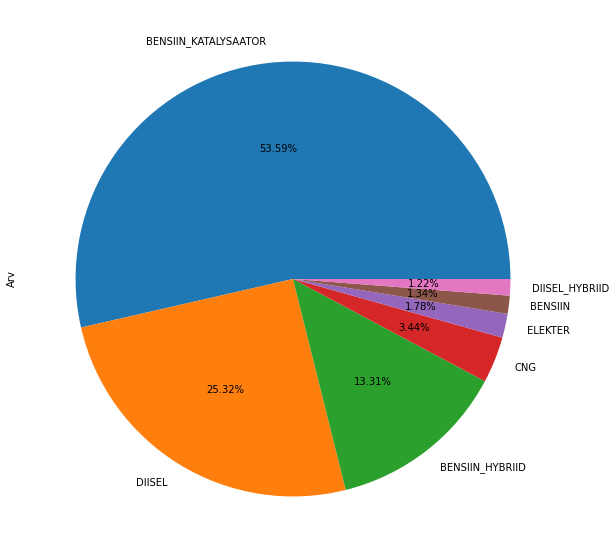

In [88]:
def show_pie(dataframe, groupby, index = None):
    plt.figure(figsize=(10, 10))
    dataframe = dataframe.groupby(
        [groupby], 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe['Arv'].plot.pie(autopct='%1.2f%%')
    print(dataframe)

show_pie(df, 'Mootori tüüp')

# Engine capacities

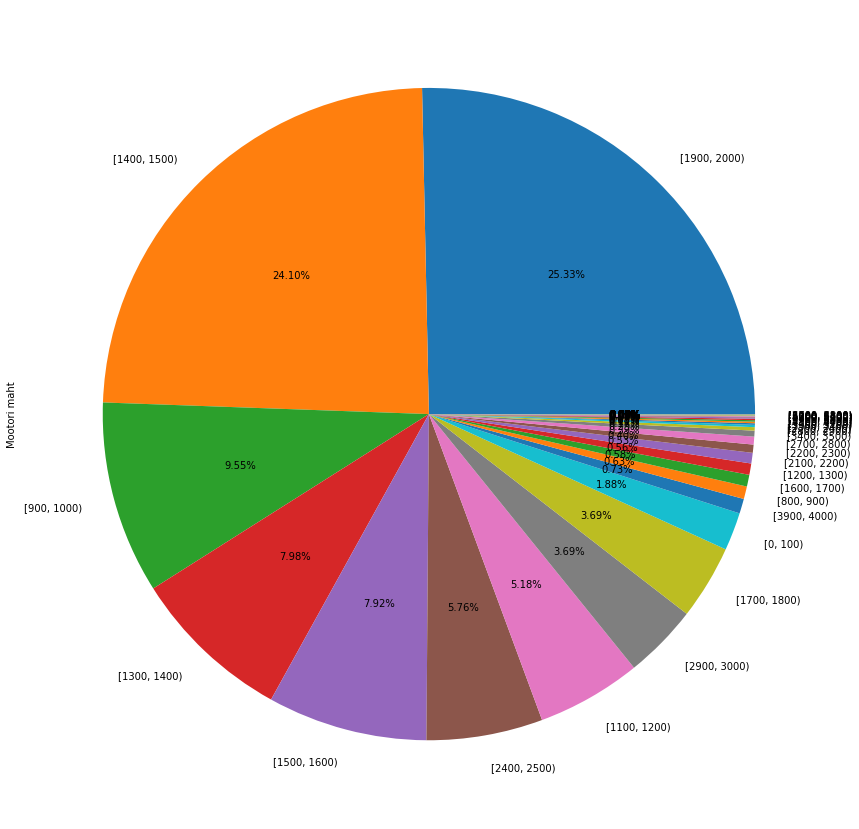

In [89]:
plt.figure(figsize=(15, 15))

bins = range(df['Mootori maht'].min(), df['Mootori maht'].max() + 100, 100)
capacities = pd.cut(df['Mootori maht'], bins, right=False).value_counts()
capacities.plot(kind='pie', autopct='%1.2f%%')
pass

# Top 10 popular manufacturers

Two charts might be displayed:
* 'model' - data is grouped by mark and model
* 'full model' - data is grouped by mark, model and engine

          Mark   Arv
1       TOYOTA  3362
2      RENAULT  2021
3        SKODA  1894
4          KIA  1259
5   VOLKSWAGEN  1197
6      PEUGEOT  1173
7      CITROEN  1161
8        ŠKODA   990
9        DACIA   706
10     HYUNDAI   621


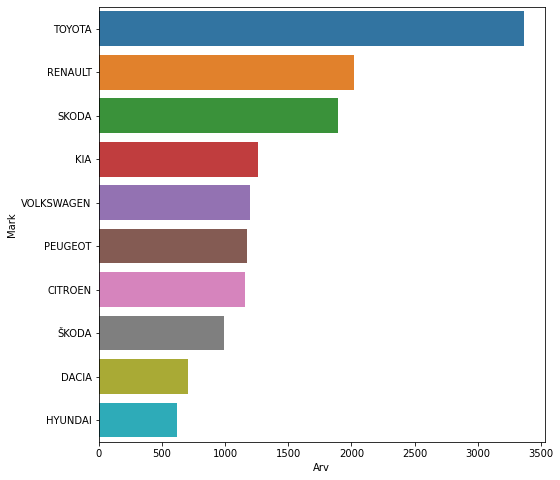

In [90]:
LIMIT = 10

def group_and_sort(data_frame, selection):
    return data_frame.groupby(
        selection, 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)

def group_sort_and_plot(data_frame, selection, x='Arv', y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1 
    y = selection[0] if y is None else y
    if plot:
        plt.figure(figsize=(8, 8))
        sns.barplot(x=x, y=y, data=data[:limit], orient='h')
    print(data.head(limit))
    
group_sort_and_plot(df, ['Mark'])

## Top 10 popular car models

               model   Arv
1        TOYOTA RAV4  1400
2     TOYOTA COROLLA   977
3       RENAULT CLIO   942
4      SKODA OCTAVIA   637
5   CITROEN BERLINGO   601
6      ŠKODA OCTAVIA   412
7           KIA CEED   403
8       KIA SPORTAGE   399
9       SKODA KODIAQ   355
10      DACIA DUSTER   327


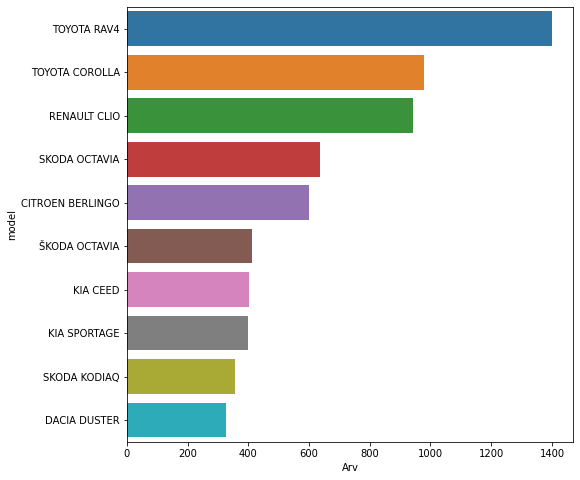

In [91]:
group_sort_and_plot(df, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  864
2   RENAULT CLIO(BENSIIN_KATALYSAATOR, 0.9 cm3, 56...  679
3       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  536
4            CITROEN BERLINGO(DIISEL, 1.5 cm3, 96 kW)  467
5     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  456
6   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.2 cm3, ...  273
7                PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)  249
8     KIA CEED(BENSIIN_KATALYSAATOR, 1.4 cm3, 103 kW)  226
9   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.6 cm3, ...  213
10                 SKODA OCTAVIA(CNG, 1.5 cm3, 96 kW)  212


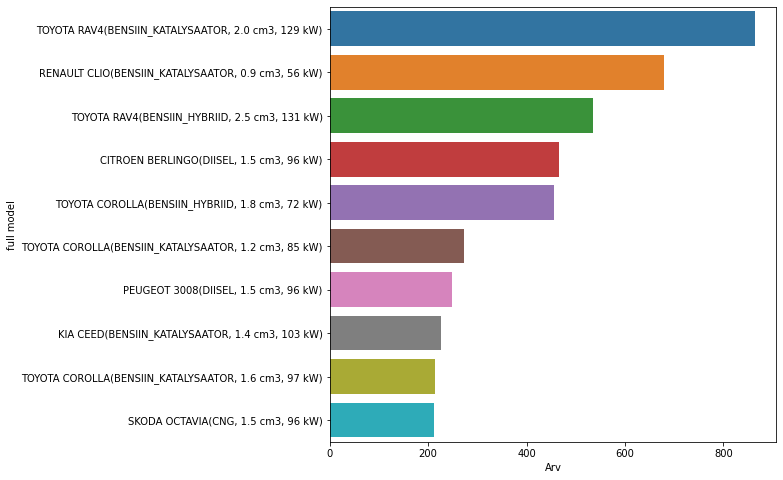

In [92]:
group_sort_and_plot(df, ['full model'])

### Top 10 popular diesel models

                  model  Arv
1      CITROEN BERLINGO  506
2          PEUGEOT 3008  250
3         ŠKODA OCTAVIA  209
4         SKODA OCTAVIA  183
5          PEUGEOT 2008  182
6          KIA SPORTAGE  166
7          SKODA KODIAQ  165
8          PEUGEOT 5008  153
9     AUDI Q3 SPORTBACK  138
10  CITROEN C5 AIRCROSS  125


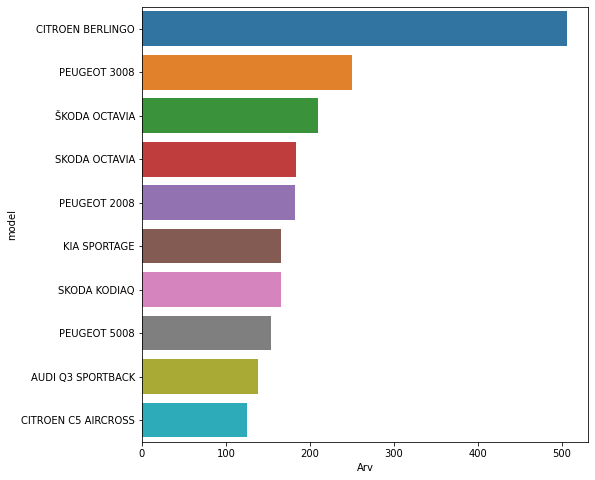

In [93]:
df_diesel = df[df['Mootori tüüp'] == 'DIISEL']

group_sort_and_plot(df_diesel, ['model'])

                                     full model  Arv
1      CITROEN BERLINGO(DIISEL, 1.5 cm3, 96 kW)  467
2          PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)  249
3        ŠKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)  202
4        SKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)  157
5          PEUGEOT 2008(DIISEL, 1.5 cm3, 96 kW)  151
6          PEUGEOT 5008(DIISEL, 1.5 cm3, 96 kW)  148
7         KIA SPORTAGE(DIISEL, 1.6 cm3, 100 kW)  131
8    AUDI Q3 SPORTBACK(DIISEL, 2.0 cm3, 110 kW)  119
9        RENAULT KADJAR(DIISEL, 1.5 cm3, 85 kW)  117
10  CITROEN C5 AIRCROSS(DIISEL, 1.5 cm3, 96 kW)  111


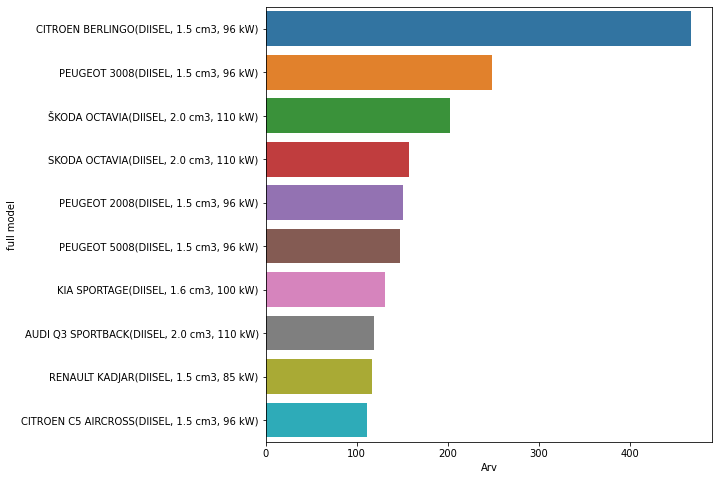

In [94]:
group_sort_and_plot(df_diesel, ['full model'])

### Top 10 popular petrol models

                model  Arv
1        RENAULT CLIO  941
2         TOYOTA RAV4  864
3      TOYOTA COROLLA  486
4            KIA CEED  320
5       DACIA SANDERO  247
6       SKODA OCTAVIA  241
7      RENAULT CAPTUR  239
8        DACIA DUSTER  239
9        KIA SPORTAGE  231
10  VOLKSWAGEN PASSAT  231


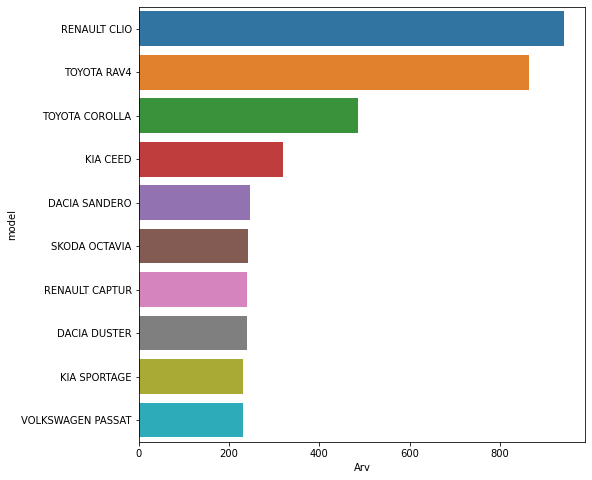

In [95]:
df_petrol = df[df['Mootori tüüp'].isin(['BENSIIN_KATALYSAATOR', 'BENSIIN'])]

group_sort_and_plot(df_petrol, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  864
2   RENAULT CLIO(BENSIIN_KATALYSAATOR, 0.9 cm3, 56...  679
3   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.2 cm3, ...  273
4     KIA CEED(BENSIIN_KATALYSAATOR, 1.4 cm3, 103 kW)  226
5   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.6 cm3, ...  213
6   VOLKSWAGEN PASSAT(BENSIIN_KATALYSAATOR, 1.5 cm...  198
7   DACIA SANDERO(BENSIIN_KATALYSAATOR, 1.0 cm3, 7...  192
8   SKODA OCTAVIA(BENSIIN_KATALYSAATOR, 1.5 cm3, 1...  177
9   HYUNDAI TUCSON(BENSIIN_KATALYSAATOR, 1.6 cm3, ...  176
10  RENAULT MEGANE(BENSIIN_KATALYSAATOR, 1.3 cm3, ...  174


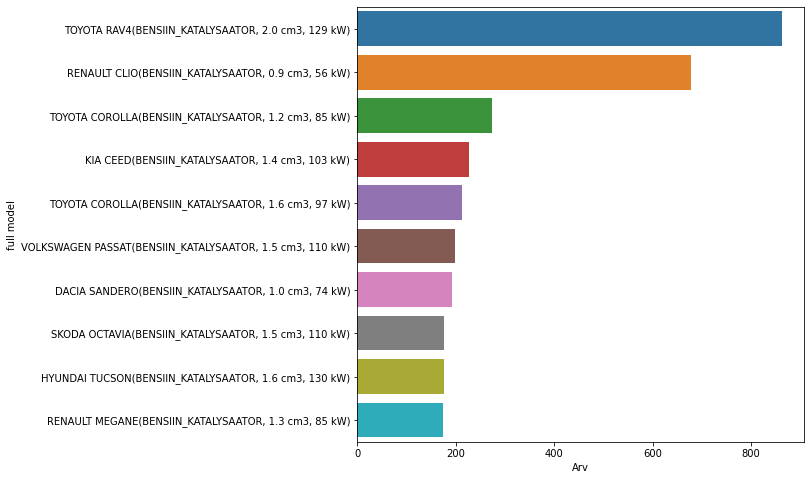

In [96]:
group_sort_and_plot(df_petrol, ['full model'])

### Top 10 popular hybrid models(diesel and petrol)


              model  Arv
1       TOYOTA RAV4  536
2    TOYOTA COROLLA  491
3       TOYOTA C-HR  211
4      TOYOTA CAMRY  176
5        HONDA CR-V  115
6   SUBARU FORESTER   77
7           MAZDA 3   76
8        VOLVO XC60   59
9     ŠKODA OCTAVIA   50
10  VOLKSWAGEN GOLF   48


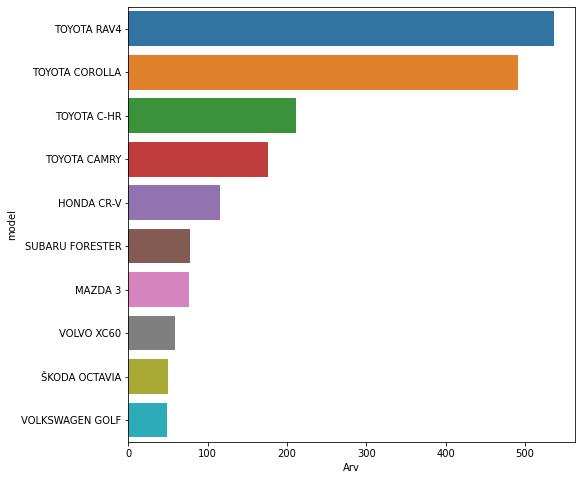

In [97]:
df_hybrids = df[df['Mootori tüüp'].apply(lambda x: 'HYBRIID' in x)]

group_sort_and_plot(df_hybrids, ['model'])

                                           full model  Arv
1       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  536
2     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  456
3        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  186
4      TOYOTA CAMRY(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  176
5        HONDA CR-V(BENSIIN_HYBRIID, 2.0 cm3, 107 kW)  115
6   SUBARU FORESTER(BENSIIN_HYBRIID, 2.0 cm3, 110 kW)   77
7   VOLKSWAGEN GOLF(BENSIIN_HYBRIID, 1.5 cm3, 110 kW)   48
8       TOYOTA YARIS(BENSIIN_HYBRIID, 1.5 cm3, 68 kW)   47
9           MAZDA 3(BENSIIN_HYBRIID, 2.0 cm3, 132 kW)   43
10  TOYOTA YARIS HYBRID(BENSIIN_HYBRIID, 1.5 cm3, ...   43


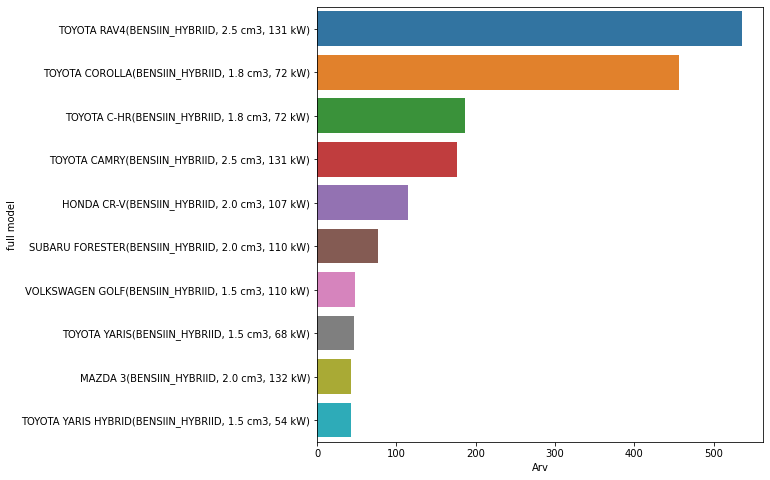

In [98]:
group_sort_and_plot(df_hybrids, ['full model'])

### Top 10 popular electric models

                         model  Arv
1                 HYUNDAI KONA   58
2            NISSAN LEAF 62KWH   35
3                  RENAULT ZOE   33
4            NISSAN LEAF 40KWH   21
5                TESLA MODEL 3   20
6            PORSCHE TAYCAN 4S   19
7               VOLKSWAGEN UP!   18
8                      HONDA E   17
9   VOLKSWAGEN ID.3 PRO 150 KW   15
10                 PEUGEOT 208   15


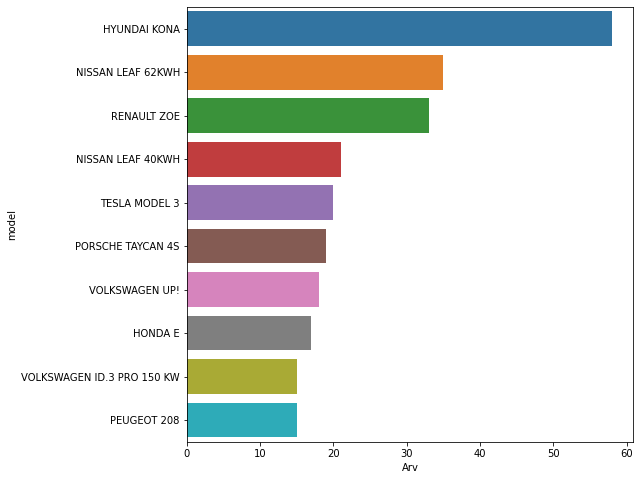

In [99]:
df['Mootori tüüp'].unique()
df_electric = df[df['Mootori tüüp'] == 'ELEKTER']

group_sort_and_plot(df_electric, ['model'])

                                           full model  Arv
1               HYUNDAI KONA(ELEKTER, 0.0 cm3, 28 kW)   54
2          NISSAN LEAF 62KWH(ELEKTER, 0.0 cm3, 90 kW)   35
3                RENAULT ZOE(ELEKTER, 0.0 cm3, 51 kW)   32
4          NISSAN LEAF 40KWH(ELEKTER, 0.0 cm3, 90 kW)   21
5             VOLKSWAGEN UP!(ELEKTER, 0.0 cm3, 61 kW)   18
6                    HONDA E(ELEKTER, 0.0 cm3, 60 kW)   17
7   VOLKSWAGEN ID.3 PRO 150 KW(ELEKTER, 0.0 cm3, 7...   15
8                PEUGEOT 208(ELEKTER, 0.0 cm3, 57 kW)   15
9         PORSCHE TAYCAN 4S(ELEKTER, 0.0 cm3, 140 kW)   14
10            TESLA MODEL 3(ELEKTER, 0.0 cm3, 153 kW)   13


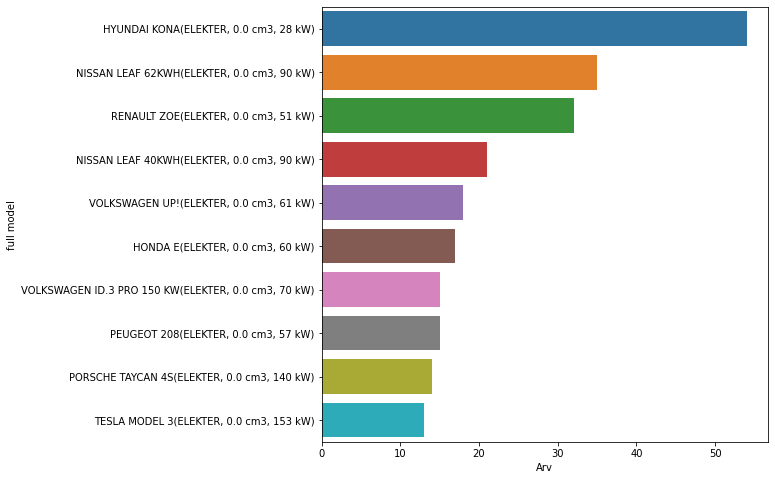

In [100]:
group_sort_and_plot(df_electric, ['full model'])

### Top 10 popular cars by private owners

                model  Arv
1         TOYOTA RAV4  694
2      TOYOTA COROLLA  458
3       SKODA OCTAVIA  360
4       ŠKODA OCTAVIA  236
5        SKODA KODIAQ  215
6        KIA SPORTAGE  202
7   VOLKSWAGEN TIGUAN  195
8         TOYOTA C-HR  191
9         SKODA KAMIQ  187
10           KIA CEED  184


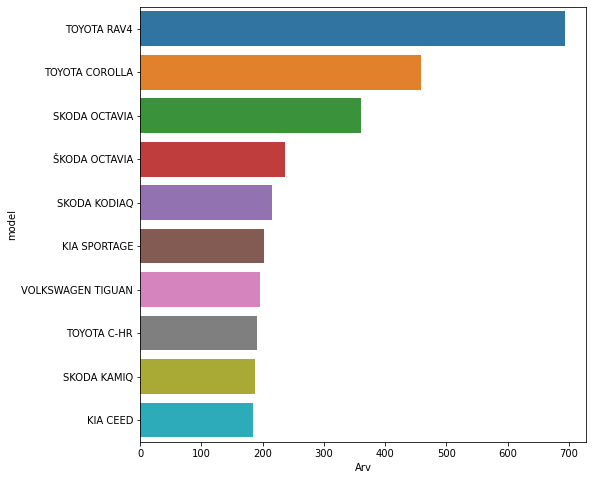

In [101]:
df_private = df[df['Tüüp'].apply(lambda x: 'Füüsiline' in x)]

group_sort_and_plot(df_private, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  403
2       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  291
3     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  197
4   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.6 cm3, ...  132
5   SKODA OCTAVIA(BENSIIN_KATALYSAATOR, 1.5 cm3, 1...  120
6   SKODA KODIAQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 11...  114
7   TOYOTA YARIS(BENSIIN_KATALYSAATOR, 1.5 cm3, 82...  114
8   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.2 cm3, ...  113
9        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  106
10                 SKODA OCTAVIA(CNG, 1.5 cm3, 96 kW)  105


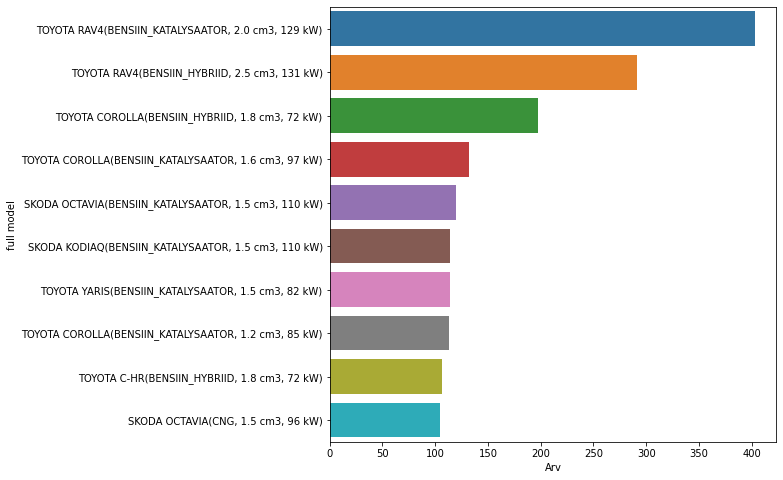

In [102]:
group_sort_and_plot(df_private, ['full model'])

### Top 10 popular cars by company owners

               model  Arv
1       RENAULT CLIO  895
2        TOYOTA RAV4  706
3   CITROEN BERLINGO  533
4     TOYOTA COROLLA  519
5      SKODA OCTAVIA  277
6     RENAULT CAPTUR  272
7       PEUGEOT 3008  250
8     RENAULT MEGANE  228
9           KIA CEED  219
10     DACIA SANDERO  216


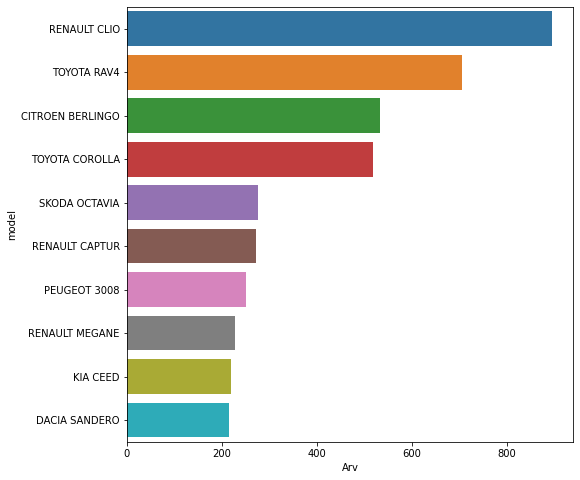

In [103]:
df_corporate = df[df['Tüüp'].apply(lambda x: 'Füüsiline' not in x)]

group_sort_and_plot(df_corporate, ['model'])

                                           full model  Arv
1   RENAULT CLIO(BENSIIN_KATALYSAATOR, 0.9 cm3, 56...  671
2   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  461
3            CITROEN BERLINGO(DIISEL, 1.5 cm3, 96 kW)  436
4     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  259
5       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  245
6                PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)  228
7   DACIA SANDERO(BENSIIN_KATALYSAATOR, 1.0 cm3, 7...  176
8   RENAULT MEGANE(BENSIIN_KATALYSAATOR, 1.3 cm3, ...  162
9   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.2 cm3, ...  160
10              RENAULT CLIO(BENSIIN, 0.9 cm3, 56 kW)  158


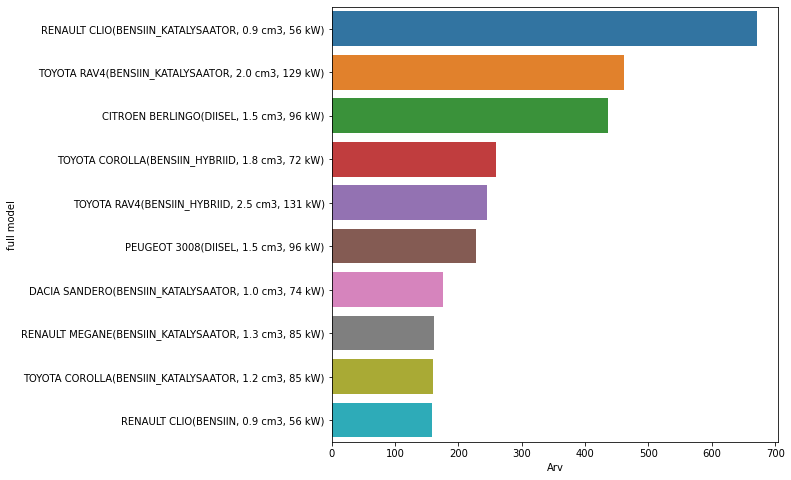

In [104]:
group_sort_and_plot(df_corporate, ['full model'])

### SUV vs non SUV

           SUV    Arv
non-SUV  False  10525
SUV       True   8760


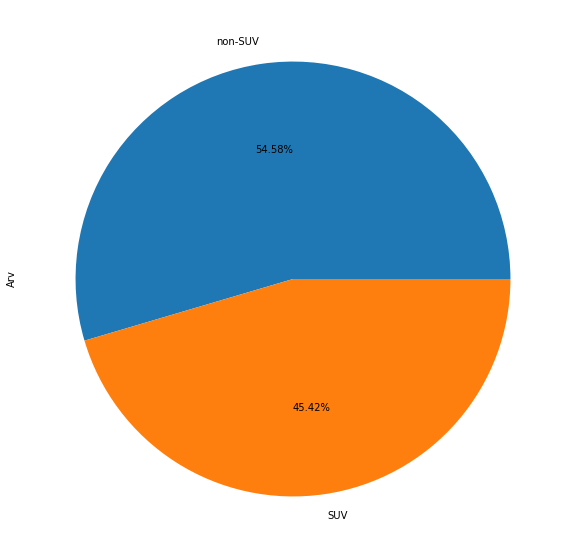

In [105]:
show_pie(df, 'SUV', index=['non-SUV', 'SUV'])

### Popular fuels in SUV

                       Arv
Mootori tüüp              
BENSIIN_KATALYSAATOR  4780
DIISEL                2338
BENSIIN_HYBRIID       1348
DIISEL_HYBRIID         198
ELEKTER                 73
CNG                     13
BENSIIN                 10


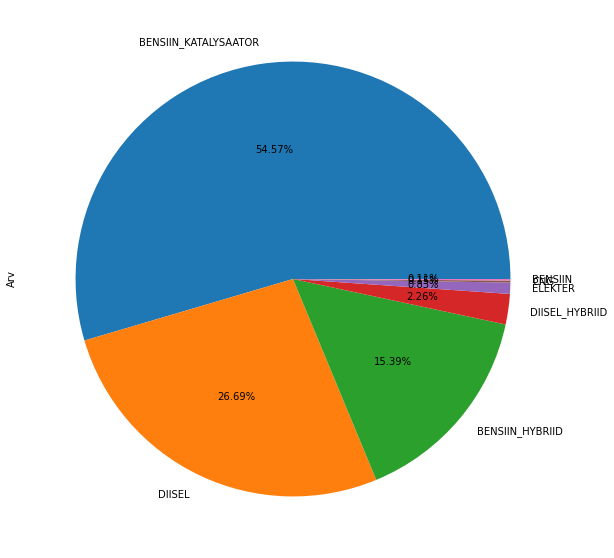

In [106]:
df_suv = df[
    df['Mudel'].apply(
        lambda x: any([suv.lower() in x.lower() for suv in SUVS])
    )
]

show_pie(df_suv, 'Mootori tüüp')

### Top 10 popular SUV

                model   Arv
1         TOYOTA RAV4  1400
2        KIA SPORTAGE   399
3        SKODA KODIAQ   355
4        DACIA DUSTER   327
5      RENAULT CAPTUR   322
6         TOYOTA C-HR   321
7        PEUGEOT 3008   289
8   VOLKSWAGEN TIGUAN   288
9        PEUGEOT 2008   267
10         HONDA CR-V   262


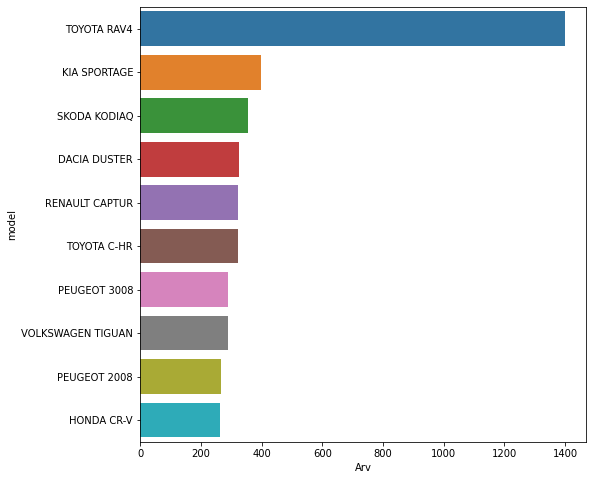

In [107]:
group_sort_and_plot(df_suv, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  864
2       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  536
3                PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)  249
4        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  186
5   HYUNDAI TUCSON(BENSIIN_KATALYSAATOR, 1.6 cm3, ...  176
6   KIA SPORTAGE(BENSIIN_KATALYSAATOR, 1.6 cm3, 13...  160
7   SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...  154
8                PEUGEOT 2008(DIISEL, 1.5 cm3, 96 kW)  151
9   DACIA DUSTER(BENSIIN_KATALYSAATOR, 1.0 cm3, 74...  150
10               PEUGEOT 5008(DIISEL, 1.5 cm3, 96 kW)  148


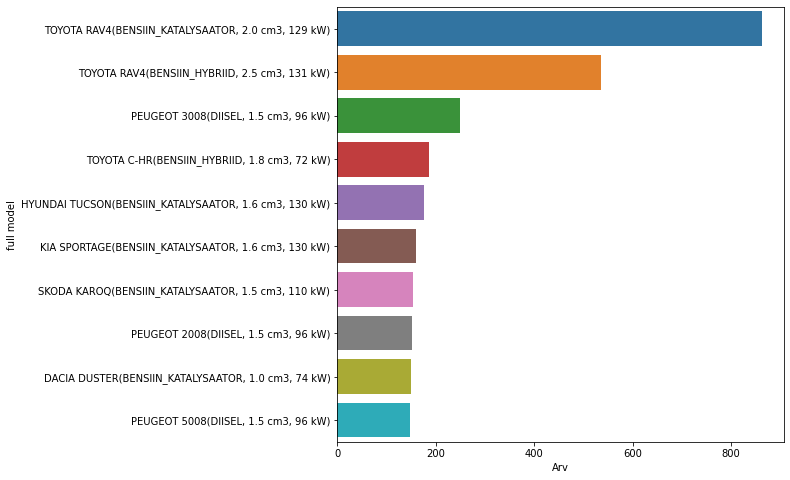

In [108]:
group_sort_and_plot(df_suv, ['full model'])

### Top 10 popular Diesel SUV

                  model  Arv
1          PEUGEOT 3008  250
2          PEUGEOT 2008  182
3          KIA SPORTAGE  166
4          SKODA KODIAQ  165
5          PEUGEOT 5008  153
6     AUDI Q3 SPORTBACK  138
7   CITROEN C5 AIRCROSS  125
8        RENAULT KADJAR  120
9     VOLKSWAGEN TIGUAN  117
10         ŠKODA KODIAQ  101


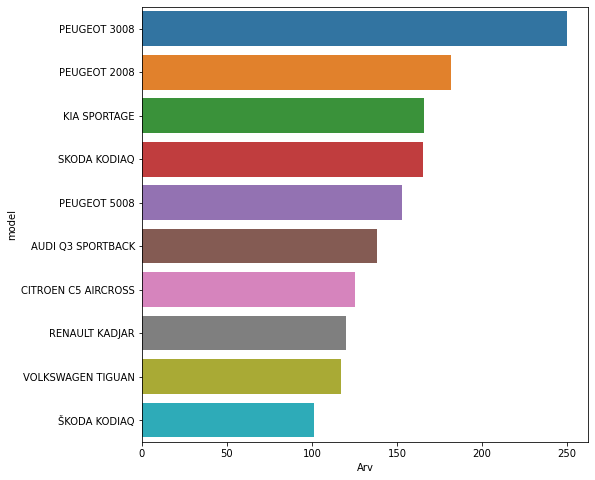

In [109]:
df_diesel_suv = df_diesel[
    df_diesel['Mudel'].apply(
        lambda x: any([suv.lower() in x.lower() for suv in SUVS])
    )
]

group_sort_and_plot(df_diesel_suv, ['model'])

                                     full model  Arv
1          PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)  249
2          PEUGEOT 2008(DIISEL, 1.5 cm3, 96 kW)  151
3          PEUGEOT 5008(DIISEL, 1.5 cm3, 96 kW)  148
4         KIA SPORTAGE(DIISEL, 1.6 cm3, 100 kW)  131
5    AUDI Q3 SPORTBACK(DIISEL, 2.0 cm3, 110 kW)  119
6        RENAULT KADJAR(DIISEL, 1.5 cm3, 85 kW)  117
7   CITROEN C5 AIRCROSS(DIISEL, 1.5 cm3, 96 kW)  111
8    VOLKSWAGEN TIGUAN(DIISEL, 2.0 cm3, 110 kW)  108
9         SKODA KODIAQ(DIISEL, 2.0 cm3, 110 kW)  107
10         DACIA DUSTER(DIISEL, 1.5 cm3, 85 kW)   78


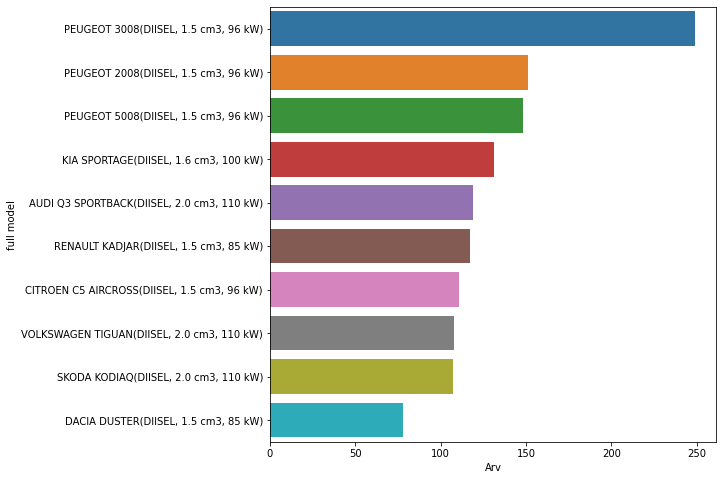

In [110]:
group_sort_and_plot(df_diesel_suv, ['full model'])

### Top 10 popular Petrol SUV

                 model  Arv
1          TOYOTA RAV4  864
2         DACIA DUSTER  239
3       RENAULT CAPTUR  239
4         KIA SPORTAGE  231
5       HYUNDAI TUCSON  209
6       NISSAN QASHQAI  196
7         SKODA KODIAQ  190
8    VOLKSWAGEN TIGUAN  171
9          SKODA KAROQ  165
10  VOLKSWAGEN T-CROSS  153


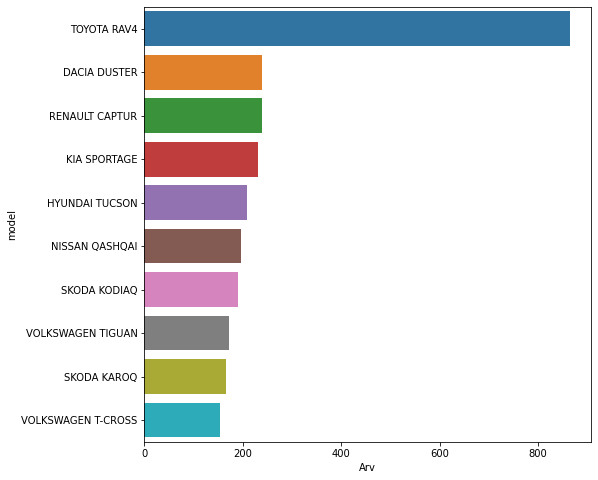

In [111]:
df_petrol_suv = df_petrol[
    df_petrol['Mudel'].apply(
        lambda x: any([suv.lower() in x.lower() for suv in SUVS])
    )
]

group_sort_and_plot(df_petrol_suv, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  864
2   HYUNDAI TUCSON(BENSIIN_KATALYSAATOR, 1.6 cm3, ...  176
3   KIA SPORTAGE(BENSIIN_KATALYSAATOR, 1.6 cm3, 13...  160
4   SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...  154
5   DACIA DUSTER(BENSIIN_KATALYSAATOR, 1.0 cm3, 74...  150
6   RENAULT CAPTUR(BENSIIN_KATALYSAATOR, 1.0 cm3, ...  142
7   HONDA CR-V(BENSIIN_KATALYSAATOR, 1.5 cm3, 142 kW)  135
8   SKODA KODIAQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 11...  131
9   NISSAN QASHQAI(BENSIIN_KATALYSAATOR, 1.3 cm3, ...  123
10  VOLKSWAGEN TIGUAN(BENSIIN_KATALYSAATOR, 1.5 cm...  123


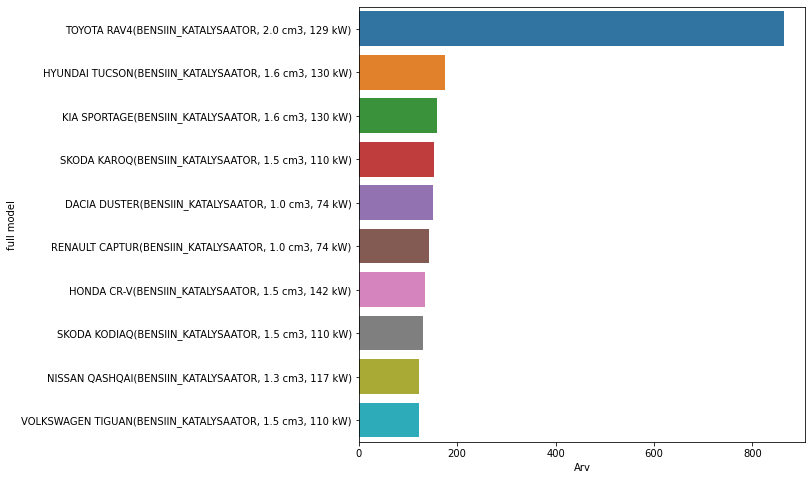

In [112]:
group_sort_and_plot(df_petrol_suv, ['full model'])

### Top 10 popular hybrid SUV

              model  Arv
1       TOYOTA RAV4  536
2       TOYOTA C-HR  211
3        HONDA CR-V  115
4   SUBARU FORESTER   77
5        VOLVO XC60   59
6        VOLVO XC90   45
7       MAZDA CX-30   40
8           AUDI Q7   39
9      LEXUS RX450H   39
10     LEXUS NX300H   35


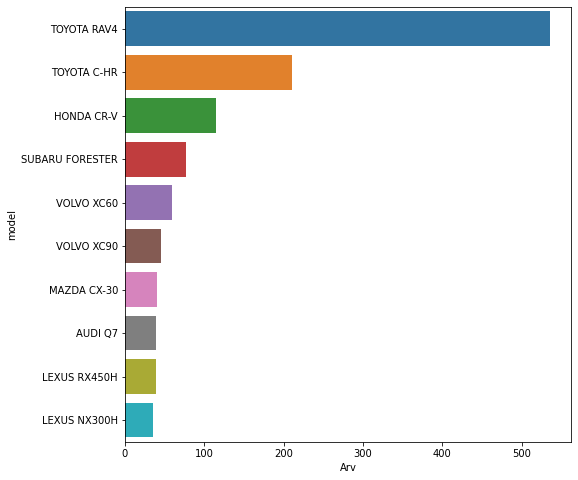

In [113]:
df_hybrid_suv = df_hybrids[
    df_hybrids['Mudel'].apply(
        lambda x: any([suv.lower() in x.lower() for suv in SUVS])
    )
]

group_sort_and_plot(df_hybrid_suv, ['model'])

                                           full model  Arv
1       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  536
2        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  186
3        HONDA CR-V(BENSIIN_HYBRIID, 2.0 cm3, 107 kW)  115
4   SUBARU FORESTER(BENSIIN_HYBRIID, 2.0 cm3, 110 kW)   77
5            AUDI Q7(DIISEL_HYBRIID, 3.0 cm3, 210 kW)   39
6      LEXUS RX450H(BENSIIN_HYBRIID, 3.5 cm3, 193 kW)   39
7         VOLVO XC90(DIISEL_HYBRIID, 2.0 cm3, 173 kW)   35
8      LEXUS NX300H(BENSIIN_HYBRIID, 2.5 cm3, 114 kW)   35
9         VOLVO XC60(DIISEL_HYBRIID, 2.0 cm3, 145 kW)   30
10          KIA NIRO(BENSIIN_HYBRIID, 1.6 cm3, 77 kW)   26


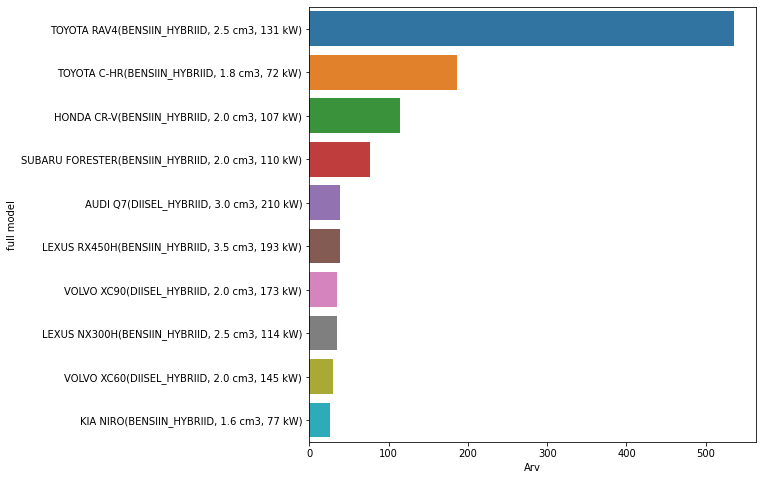

In [114]:
group_sort_and_plot(df_hybrid_suv, ['full model'])

### Most popular models per city

In [115]:
# Popular car per each city
data = df
data.replace('Narva- Jõesuu','Narva-Jõesuu', inplace=True)
cities = set(data['Linn'].tolist())

for city in cities:
    print()
    print(city)
    group_sort_and_plot(data[data['Linn'] == city], ['full model'], limit=3, plot=False)


Määramata
                                          full model  Arv
1  RENAULT CLIO(BENSIIN_KATALYSAATOR, 0.9 cm3, 56...  674
2           CITROEN BERLINGO(DIISEL, 1.5 cm3, 96 kW)  438
3  TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  423

Loksa linn
                                          full model  Arv
1             SKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)    1
2  SUBARU FORESTER(BENSIIN_HYBRIID, 2.0 cm3, 110 kW)    1
3  SUZUKI VITARA(BENSIIN_KATALYSAATOR, 1.4 cm3, 1...    1

Haapsalu linn
                                          full model  Arv
1    SUBARU XV(BENSIIN_KATALYSAATOR, 1.6 cm3, 84 kW)    3
2    KIA CEED(BENSIIN_KATALYSAATOR, 1.4 cm3, 103 kW)    2
3  SUZUKI VITARA(BENSIIN_KATALYSAATOR, 1.4 cm3, 1...    2

Keila
                                          full model  Arv
1    KIA CEED(BENSIIN_KATALYSAATOR, 1.4 cm3, 103 kW)    4
2  SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...    4
3  TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...    3

Loksa
                    

# Top 3 for each mark

In [116]:
marks = ['ALFA ROMEO', 'ALPINE', 'ASTON MARTIN', 
         'AUDI', 'BENTLEY', 'BMW', 'BMW I', 
         'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 
         'DACIA', 'DODGE', 'DS', 'FERRARI', 'FIAT', 'FORD', 
         'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 
         'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LOTUS', 'MASERATI', 
         'MAZDA', 'MERCEDES-AMG', 'MERCEDES-BENZ', 'MINI', 
         'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT', 
         'PORSCHE', 'RENAULT', 'SEAT', 'SKODA', 'SSANGYONG', 
         'SUBARU', 'SUZUKI', 'TESLA MOTORS', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO']

for mark in marks:
    models = df[df['Mark'] == mark]
    print("Top 3 {} models".format(mark))
    group_sort_and_plot(models, ['full model'], limit=3, plot=False)
    print()


Top 3 ALFA ROMEO models
                                          full model  Arv
1  ALFA ROMEO STELVIO(BENSIIN_KATALYSAATOR, 2.0 c...    9
2  ALFA ROMEO GIULIA(BENSIIN_KATALYSAATOR, 2.0 cm...    4
3  ALFA ROMEO ALFA GIULIETTA(BENSIIN_KATALYSAATOR...    1

Top 3 ALPINE models
Empty DataFrame
Columns: [full model, Arv]
Index: []

Top 3 ASTON MARTIN models
Empty DataFrame
Columns: [full model, Arv]
Index: []

Top 3 AUDI models
                                   full model  Arv
1  AUDI Q3 SPORTBACK(DIISEL, 2.0 cm3, 110 kW)  119
2    AUDI Q7(DIISEL_HYBRIID, 3.0 cm3, 210 kW)   39
3            AUDI Q3(DIISEL, 2.0 cm3, 110 kW)   33

Top 3 BENTLEY models
                                          full model  Arv
1  BENTLEY FLYING SPUR(BENSIIN_KATALYSAATOR, 6.0 ...    4
2  BENTLEY CONTINENTAL GT V8(BENSIIN_KATALYSAATOR...    3
3  BENTLEY BENTAYGA V8(BENSIIN_KATALYSAATOR, 4.0 ...    2

Top 3 BMW models
                                          full model  Arv
1         BMW X5 XDRIVE 30D(DIISEL, 3